# Машинное обучение в биологии

### Семинар 2: Основные понятия и простейшая модель машинного обучения. Классификатор KNN. 

#### Учимся на геномных эмбеддингах. Работа с веществами в Python. Классификация веществ и проблемы разбиения их на обучение и тест.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

### Задача 1: Предсказание рака молочной железы

В этой задаче предлагается произвести предсказание рака молочной железы на известном <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">датасете</a> UCI ML Breast Cancer Wisconsin (Diagnostic) dataset.

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Датасет загружен за вас, определены `X` и `y`.

In [5]:
data['data'].head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [6]:
X = data['data']
y = data['target']

In [7]:
SEED = 777

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 4:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

**Осуществите стандартизацию признаков в выборке**.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Импортируйте модель классификации k-NN и обучите ее (`model.fit`)**.\
*Вопрос*: на какой части выборки происходит обучение: тренировочной или тестовой?

In [23]:
# knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками бинарной классификации: precision, recall, F1-score.

In [25]:
# predict
y_pred = knn.predict(X_test)
# evaluate: precision, recall, f1-score, support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.95      1.00      0.97        76

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



Следующая функция строит график зависимости качества на тестовой и тренировочной выборках от параметра модели.\
Измените помеченную строку в функции так, чтобы ее можно было использовать **для построения графика зависимости качества от количества соседей для модели k-NN**.

In [26]:
from sklearn.metrics import f1_score

def make_qual_chart(X_train, X_test, y_train, y_test, metric=f1_score, limit=50):
    train_quals = np.zeros(limit)
    test_quals = np.zeros(limit)
    param_range = np.arange(1, limit + 1)
    
    for ind, value in enumerate(param_range):
        ### CHANGE THE NEXT LINE!
        model = KNeighborsClassifier(n_neighbors=value)
        # FIT
        model.fit(X_train, y_train)
        # PREDICT
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        # EVALUATE QUALITY
        train_quals[ind] = metric(y_true=y_train, y_pred=y_train_pred)
        test_quals[ind] = metric(y_true=y_test, y_pred=y_test_pred)
    
    
    
    # TRACING CHART
    plt.figure(figsize=(10, 7))
    plt.plot(param_range, train_quals, label="Train")
    plt.plot(param_range, test_quals, label="Test")
   
    plt.legend()
    plt.show()
    return param_range, train_quals, test_quals

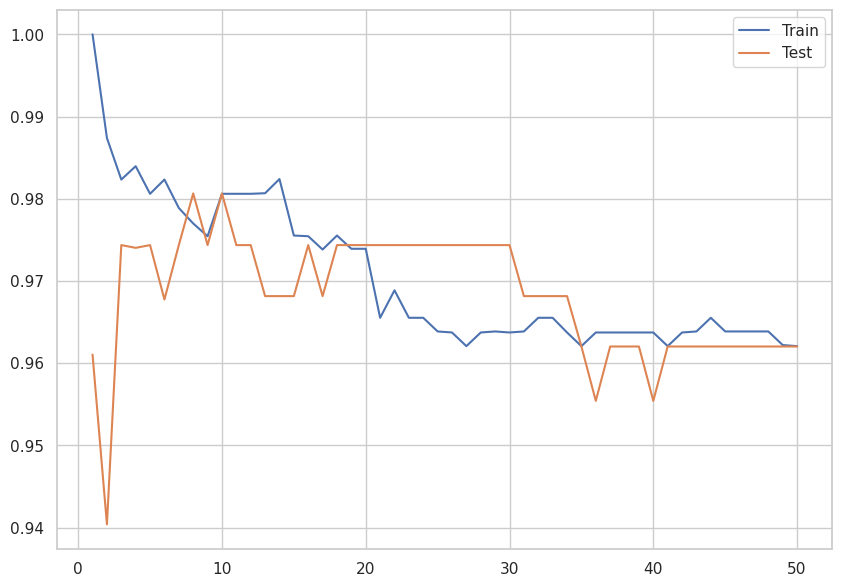

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 array([1.        , 0.98738739, 0.98233216, 0.98395722, 0.98059965,
        0.98233216, 0.97887324, 0.97699115, 0.9754386 , 0.98059965,
        0.98059965, 0.98059965, 0.98066784, 0.98239437, 0.97552448,
        0.9754386 , 0.97382199, 0.97552448, 0.97391304, 0.97391304,
        0.96551724, 0.96885813, 0.96551724, 0.96551724, 0.96385542,
        0.96373057, 0.96206897, 0.96373057, 0.96385542, 0.96373057,
        0.96385542, 0.96551724, 0.96551724, 0.96373057, 0.96206897,
        0.96373057, 0.96373057, 0.96373057, 0.96373057, 0.96373057,
        0.96206897, 0.96373057, 0.96385542, 0.96551724, 0.96385542,
        0.96385542, 0.96385542, 0.96385542, 0.96219931, 0.96206897]),
 array([0.96103896, 0.94039735, 0.97435897, 0.97402597, 0.97435897,
        0.96774194, 0.97

In [27]:
make_qual_chart(X_train, X_test, y_train, y_test)

Сделайте вывод о том, **какое число соседей является оптимальным для данной задачи**.

In [28]:
OPTIMAL_K = 10

In [29]:
knn = KNeighborsClassifier(n_neighbors=OPTIMAL_K)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.96      1.00      0.98        76

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



### Задача 2: Классификация химических веществ

In [30]:
!wget --no-check-certificate 'https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/data/bace.csv' -O bace.csv

--2022-09-30 16:17:27--  https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/data/bace.csv
Resolving data.bioml.ru (data.bioml.ru)... 178.62.218.34
Connecting to data.bioml.ru (data.bioml.ru)|178.62.218.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3897767 (3.7M) [text/csv]
Saving to: ‘bace.csv’

bace.csv            100%[===================>]   3.72M  2.65MB/s    in 1.4s    

2022-09-30 16:17:29 (2.65 MB/s) - ‘bace.csv’ saved [3897767/3897767]



Датасет [BACE](http://moleculenet.ai/datasets-1) загружен за вас, определены `X`, `y` и `smiles`.

In [31]:
bace = pd.read_csv("./bace.csv", header=0)
bace.head(3)

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3


In [32]:
X = bace.iloc[:,4:].values
y = bace["Class"].values
smiles = bace["mol"].values

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 3:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=SEED)

**Осуществите стандартизацию признаков в выборке**.

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Импортируйте модель k-NN и обучите ее на соответствующей части выборки (`model.fit`)**.

In [61]:
# knn classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками из отчета о классификации (`classification_report`).

In [62]:
# predict
y_pred = knn.predict(X_test)
# evaluate: precision, recall, f1-score, support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       277
           1       0.78      0.83      0.81       223

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



In [63]:
print(f1_score(y_test, y_pred))

0.8069414316702819


Функция `fingerprint_train_test_split`, приведенная ниже, осуществляет **разбиение train/test на основании молекулярных "отпечатков" (molecular fingerprints)**. Воспользуйтесь ей, чтобы получить **неслучайное разбиение на train/test** и повторите предыдущие шаги, чтобы оценить качество модели на таком случае.

In [49]:
!pip install rdkit-pypi

In [50]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [51]:
def _split_fingerprints(fps, size1, size2):
    """This is called by fingerprint_train_test_split to divide a list of fingerprints into
    two groups.
    """
    assert len(fps) == size1 + size2

    # Begin by assigning the first molecule to the first group.

    fp_in_group = [[fps[0]], []]
    indices_in_group = ([0], [])
    remaining_fp = fps[1:]
    remaining_indices = list(range(1, len(fps)))
    max_similarity_to_group = [
        DataStructs.BulkTanimotoSimilarity(fps[0], remaining_fp),
        [0] * len(remaining_fp)
    ]
    while len(remaining_fp) > 0:
    # Decide which group to assign a molecule to.
        group = 0 if len(fp_in_group[0]) / size1 <= len(
            fp_in_group[1]) / size2 else 1

        # Identify the unassigned molecule that is least similar to everything in
        # the other group.

        i = np.argmin(max_similarity_to_group[1 - group])

        # Add it to the group.

        fp = remaining_fp[i]
        fp_in_group[group].append(fp)
        indices_in_group[group].append(remaining_indices[i])

        # Update the data on unassigned molecules.

        similarity = DataStructs.BulkTanimotoSimilarity(fp, remaining_fp)
        max_similarity_to_group[group] = np.delete(
            np.maximum(similarity, max_similarity_to_group[group]), i)
        max_similarity_to_group[1 - group] = np.delete(
            max_similarity_to_group[1 - group], i)
        del remaining_fp[i]
        del remaining_indices[i]
    return indices_in_group

In [52]:
def fingerprint_train_test_split(X, y, smiles, test_size=0.1):
    assert X.shape[0] == y.shape[0] == smiles.shape[0]
    mols = [Chem.MolFromSmiles(s) for s in smiles]
    fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, 1024) for x in mols]

    # Split into two groups: training set and everything else.

    test_size = int(test_size * len(y))
    train_size = len(y) - test_size
    train_inds, test_inds = _split_fingerprints(fps, train_size, test_size)
    
    X_train = X[train_inds,:]
    X_test = X[test_inds,:]
    y_train = y[train_inds]
    y_test = y[test_inds]
    
    return X_train, X_test, y_train, y_test

In [53]:
X_train, X_test, y_train, y_test = fingerprint_train_test_split(X, y, smiles, test_size=0.33)

In [54]:
# knn classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)
# evaluate: precision, recall, f1-score, support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51       257
           1       0.48      0.49      0.49       242

    accuracy                           0.50       499
   macro avg       0.50      0.50      0.50       499
weighted avg       0.50      0.50      0.50       499



In [55]:
print(f1_score(y_test, y_pred))

0.48559670781893005


**Сделайте выводы**.

---

### Задача 3*: другие параметры k-NN

У алгоритма k-NN есть и другие параметры, влияющие на результат его обучения. В частности, параметр `metric`, отвечающий за принцип вычисления расстояния между объектами.

Множество возможных метрик, известных sklearn`у, преечислено <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics">здесь</a>.

**Задача**: адаптируйте пример с лунами из лекции. Проверьте, влияет ли выбор метрики расстояния в этом примере на результат классификации:
* зафиксируйте число соседей, которое кажется вам наиболее подходящим
* выберите 4 метрики, например, `cosine`, `l1`, `l2` и значение по умолчанию
* проверьте, есть ли разница в получившейся разметке для выбранных метрик

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(12, 12))
n_samples = 100
points, labels = make_moons(noise=0.3, random_state=371, n_samples=n_samples)
# дополните код ниже:
# замените `???` на что-то разумное
for n_nei, ax in zip(???, axes.flat):
    classifier = KNeighborsClassifier(???)
    classifier.fit(points, labels)

    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    ax.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap_bold,
                edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"??? = {???}")